In [40]:
# Three bservation I made from my figures and tables:
# 1. The ratio of male to female mice were nearly equal.  I would be interested in seeing more of the charts
#    and graphs seperate out by male and female.  And possibly age and diet.
# 2. Capomulin and Ramicane seemed the most effective in shrinking the tumor volume
# 3. During the days recorded for tumor volume for mice on Capolumin, the tumor volume went down steadily 
# 4. Of the top four regimens, only Infubinol had an outlier.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single datas 
merge=pd.merge(study_results,mouse_metadata,on='Mouse ID',how='outer')

merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
#gen a summary statistics table of mean, median, variance, stand dev, and SEM of the tumor volume for each regimen
#sort database by Tumor Volume(mm3) for median values
merge_sort = merge.sort_values(["Tumor Volume (mm3)"], ascending=True)

merge_sort.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
514,k403,45,22.050126,1,Ramicane,Male,21,16
1700,s185,45,23.343598,1,Capomulin,Female,3,17
513,k403,40,24.365505,1,Ramicane,Male,21,16
1699,s185,40,25.472143,1,Capomulin,Female,3,17
512,k403,35,26.546993,1,Ramicane,Male,21,16


In [3]:
#total tumor volume for each regimen using groupby
volume_per_regimen = merge_sort.groupby(["Drug Regimen"])
volume_per_regimen

#mean for each regimen
regimen_mean = volume_per_regimen["Tumor Volume (mm3)"].mean()

#median for each regimen
regimen_median = volume_per_regimen["Tumor Volume (mm3)"].median()

#variance for each regimen
regimen_variance = volume_per_regimen["Tumor Volume (mm3)"].var()

#standard deviation for each regimen
regimen_std = volume_per_regimen["Tumor Volume (mm3)"].std()

#SEM
regimen_sem = volume_per_regimen["Tumor Volume (mm3)"].sem()

summary_stats = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})

summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [4]:
#determine the datapoints with .groupby and .count - drug regimen and mouse id
data_points = merge.groupby(["Drug Regimen"]).count()["Mouse ID"]
data_points

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

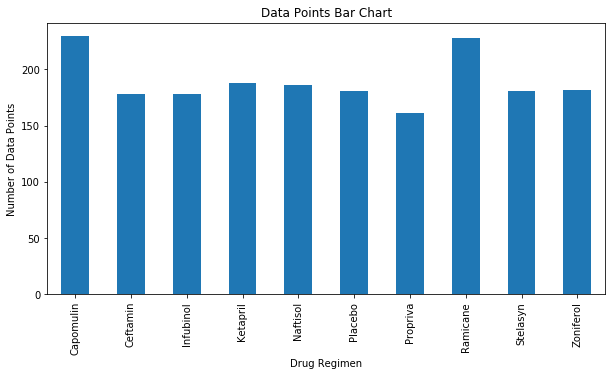

<Figure size 432x288 with 0 Axes>

In [5]:
#generate a bar plot showing number of data points for each treatment regimen using pandas
data_points.plot(kind="bar", figsize=(10,5))

#set chart title
plt.title("Data Points Bar Chart")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

#show chart and set layout
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Data Points')

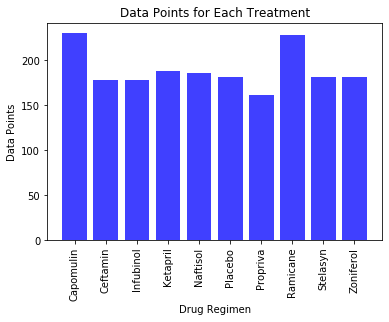

In [6]:
#generate a bar plot showing number of data points for each treatment regimen using pyplot
#create array with the datapoints
points = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

#x_axis-the amount of the Data Regimen
x_axis = np.arange(len(data_points))
plt.bar(x_axis, points, color='b', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.title("Data Points for Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

In [7]:
#groupby the 'Sex' column
sex_group = merge.groupby('Sex')

#number of data points for each gender (labels)
sex_group_count = pd.DataFrame(sex_group['Sex'].count())

sex_group_count.head()

,Sex
Sex,
Female,935
Male,958


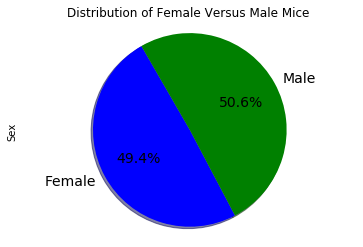

In [8]:
#Generate a pie plot showing the distribution of female versus male mice using pandas
sex_group_count.plot(kind='pie', y='Sex', title="Distribution of Female Versus Male Mice",startangle=120,\
                        autopct='%1.1f%%',shadow=True, fontsize=14, colors =["blue","green"],legend =False)
plt.axis("equal")
plt.show()

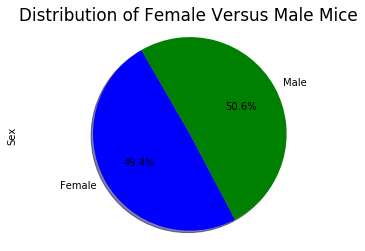

In [26]:
#generate a pie plot showing the distribution of female versus male mice using pyplot
pysex = list(sex_group_count.index.values)
pysex_counts = sex_group_count['Sex']

colors = ["blue", "green"]

plt.pie(pysex_counts, labels=pysex, colors=colors,autopct="%1.1f%%", shadow=True, startangle=120)
plt.rcParams['font.size'] = 14

plt.ylabel("Sex")
plt.axis("equal")
plt.title("Distribution of Female Versus Male Mice")
plt.show()

In [27]:
#Quartiles, outliers and boxplots for the four most promising treatment regimens
#Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#slice the original merged dataframe using treatment list
treatment_regimens = merge[merge['Drug Regimen'].isin(treatment_list)]

treatment_regimens.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [28]:
#groupby Mouse ID, use the .agg method
last_tumors = treatment_regimens.groupby(['Drug Regimen','Mouse ID']).agg(Last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)

last_tumors

Last_tumor_size
Drug Regimen Mouse ID                 
Capomulin    b128               38.983
             b742               38.940
             f966               30.486
             g288               37.074
             g316               40.159
...                                ...
Ramicane     s508               30.276
             u196               40.668
             w678               43.166
             y449               44.183
             z578               30.639

[100 rows x 1 columns]

In [29]:
#sort dataframe with Drug Regimen as columns by using unstack and use Last_tumor_size to index with stack
last_tumors_unstack = last_tumors.stack(level=0).unstack(level=0)

last_tumors_unstack.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,Last_tumor_size,NaN,NaN,67.973,NaN
a251,Last_tumor_size,NaN,NaN,65.526,NaN
a275,Last_tumor_size,NaN,62.999,NaN,NaN
a411,Last_tumor_size,NaN,NaN,NaN,38.408
a444,Last_tumor_size,NaN,NaN,NaN,43.048


In [30]:
#calculate the IQR and quantitatively determine if there are any potential outliers.
#set counter to 0 
counter = 0

#loop through each drug for quartile calculations
for drug in treatment_list:
    quartiles = last_tumors_unstack[drug].quantile([.25,.5,.75]).round(3)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    # Check if it is the first time through the for loop, if so then print dividing line at top only
    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    counter += 1

--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.125 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.562 
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.165 
Values below 36.83 for Infubinol could be outlier

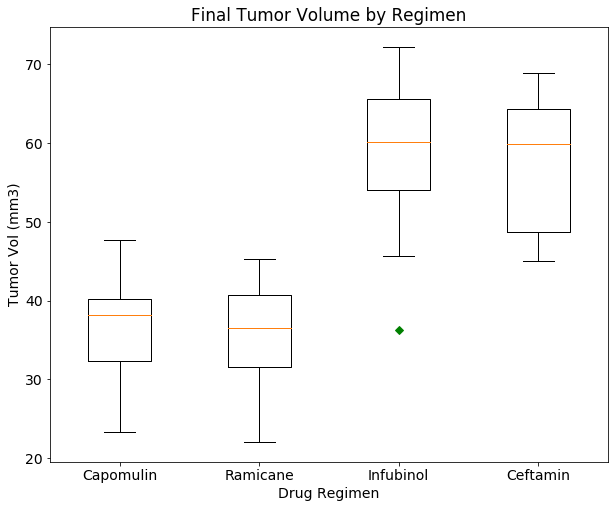

In [31]:
#generate a boxplot of the final tumor volume of each mouse across four regimes of interest
boxplot_list = []

#loop through the list of the four drugs 
for drug in treatment_list:
    boxplot_list.append(list(last_tumors_unstack[drug].dropna()))

fig1, ax = plt.subplots(figsize=(10,8))

ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.set_title('Final Tumor Volume by Regimen')

ax.boxplot(boxplot_list,notch=0,sym='gD')
plt.xticks([1,2,3,4],treatment_list)

plt.show()

In [32]:
#dataframe for Capomulin
capomulin = merge.loc[merge['Drug Regimen'] == 'Capomulin']

capomulin.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [33]:
#groupby timepoint and mean 
cap_timept = capomulin.groupby(['Timepoint']).agg(Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean)).round(4)

cap_timept.head(15)

,Tumor_Vol_Mean
Timepoint,
0,45.0000
5,44.2661
10,43.0843
15,42.0643
20,40.7163
25,39.9395
30,38.7693
35,37.8168
40,36.9580


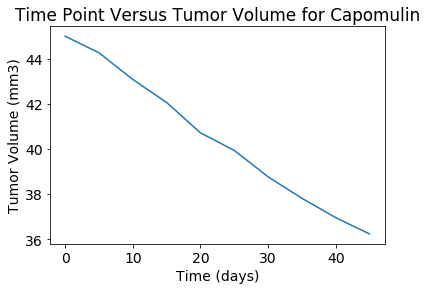

In [34]:
#line plot
plt.plot(cap_timept['Tumor_Vol_Mean'])
   
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Time Point Versus Tumor Volume for Capomulin")

plt.show()

In [35]:
# View Capomulin dataframe
capomulin.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [36]:
#groupby Mouse ID using .agg() 
#mouse weight and tumor volume mean
capomulin_mouseid = capomulin.groupby(['Mouse ID']).agg(Mouse_weight=('Weight (g)', np.mean),Tumor_vol_mean=('Tumor Volume (mm3)', np.mean)).round(4)
capomulin_mouseid.head(15)

,Mouse_weight,Tumor_vol_mean
Mouse ID,,
b128,22,41.9636
b742,21,40.0837
f966,17,36.5060
g288,19,41.9901
g316,22,44.6133
i557,24,44.8058
i738,20,39.1411
j119,23,44.4652
j246,21,43.2169


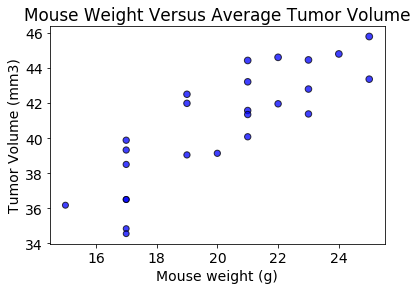

In [37]:
#scatter plot
plt.scatter(capomulin_mouseid['Mouse_weight'],capomulin_mouseid['Tumor_vol_mean'],
    marker='o',
    facecolors='blue',edgecolors='black',
    s=capomulin_mouseid['Tumor_vol_mean'],alpha=.75)

plt.title("Mouse Weight Versus Average Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

In [38]:
#correlation coefficient & linear regression model for mouse weight & avg tumor volume for the Capomulin regimen
mouse_weight = capomulin_mouseid.iloc[:,0]
avg_tumor_volume = capomulin_mouseid.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],3)}")

The correlation between both factors is 0.842


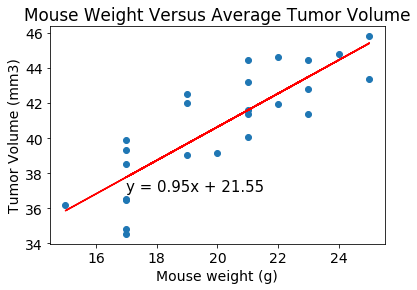

In [39]:
#scatter plot
x_values = capomulin_mouseid['Mouse_weight']
y_values = capomulin_mouseid['Tumor_vol_mean']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")

plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight Versus Average Tumor Volume")

plt.show()